Gökçe Şahin 090190306

In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
import scipy.spatial.distance as ssd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from scipy.io import loadmat
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from itertools import combinations

# MAT 388E HW3

## Q1

This is going to be an image classification problem. For this problem we are going to use [the corrected Indian Pines Dataset](https://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes#Indian_Pines).

1. Download the data (both the corrected dataset and the ground-truth dataset) into a subdirectory called `data`, and ingest it as I did in [Lecture 8](https://github.com/kaygun/2022-Fall-388E/blob/main/lecture-8.ipynb).
2. Instead of using a categorical target variable with 17 classes, from the ground-truth data you ingested create 17 binary classifiers using scikit-learn's [`LabelBinarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).

For the steps 3,4, and 5 below write an appropriate function that takes a model type ('LR','SVM', or 'KNN'), the independent variable (the dataset you ingested above) and binary target variable and returns the accuracy score of a properly constructed model given by a 10-fold cross-validation. Use scikitlearn's [cross validation](https://scikit-learn.org/stable/modules/cross_validation.html) routines. Record your results from Steps 2,3 and 4 in a pandas data frame.  

3. Construct a logistic regression model for each of the 17 class, and evaluate them using a 10-fold cross-validation. 
4. Construct an SVM model for each of the 17 class, and evaluate them using a 10-fold cross-validation. 
5. Construct a KNN model for each of the 17 class and evaluate them using a 10-fold cross-validation. You must determine what would be an appropriate K-value for each class separately, or you may decide to use a single K-value.
6. Display and analyze your cross-validation results in a table. What is the best model overall? What is the best model for each class? 

In [2]:
def lr_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X[:, 0:201], y, train_size=0.3)
    return

In [3]:
def acc_score(model_type, dataset, target):
    return

In [4]:
pine_corrected = loadmat('./data/Indian_pines_corrected.mat')['indian_pines_corrected']
pine_gt = loadmat('./data/Indian_pines_gt.mat')['indian_pines_gt']

X = pine_corrected.reshape((145*145, 200))
y = pine_gt.reshape(145*145)

In [5]:
lb = preprocessing.LabelBinarizer()
bin_labels = lb.fit_transform(y)
bin_labels.shape[1]

17

In [6]:
k_cv = KFold(n_splits=10)

In [7]:
lr_scores = []

for i in range(bin_labels.shape[1]):
    lr_model = LogisticRegression()
    score = cross_val_score(lr_model, X, bin_labels[:, i], cv=k_cv, n_jobs=-1)

    lr_scores.append(np.mean(score))

lr_scores


C:\Users\sahin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sahin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sahin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packag

[0.7176198380909335,
 0.9970511973063717,
 0.9361319722221844,
 0.9550564573376894,
 0.9865422193748861,
 0.9736457998247261,
 0.9790228539447746,
 nan,
 0.9883495690312376,
 nan,
 0.9516365094855657,
 0.9049235766222237,
 0.9659531058209174,
 nan,
 0.9276968971425443,
 0.9808843150535255,
 0.9959580645292643]

In [8]:
svc_scores = []

for i in range(bin_labels.shape[1]):
    svc_model = SVC(max_iter = 1500, kernel='rbf')
    score = cross_val_score(svc_model, X, bin_labels[:, i], cv=k_cv, n_jobs=-1)

    svc_scores.append(np.mean(score))

svc_scores

C:\Users\sahin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sahin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sahin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packag

[0.5481255539524209,
 0.9978123545132617,
 0.9309490813947544,
 0.9605264646173991,
 0.9887303851640514,
 0.9770227435501727,
 0.9652772782120419,
 nan,
 0.9735606738233133,
 nan,
 0.9537779385436871,
 0.5984160184377082,
 0.9718021873514028,
 nan,
 0.9398273862765935,
 0.9816452686638136,
 0.9952924167504806]

In [9]:
knn_scores = []

for i in range(bin_labels.shape[1]):
    knn_model = KNeighborsClassifier(n_neighbors = 5)
    score = cross_val_score(knn_model, X, bin_labels[:, i], cv=k_cv, n_jobs=-1)
    knn_scores.append(np.mean(score))

knn_scores

[0.7322708079120355,
 0.9968613095423919,
 0.9147804572598703,
 0.954913080086307,
 0.98321253268291,
 0.9714581090942982,
 0.9729348631129557,
 0.9985252819473608,
 0.9834513514968648,
 0.9990489776509748,
 0.9515404571331878,
 0.910491129296058,
 0.9660002271233203,
 0.9887254309800733,
 0.9211319699599999,
 0.977601908016865,
 0.9960531893860114]

In [10]:
np.concatenate((lr_scores, svc_scores, knn_scores))

array([0.71761984, 0.9970512 , 0.93613197, 0.95505646, 0.98654222,
       0.9736458 , 0.97902285,        nan, 0.98834957,        nan,
       0.95163651, 0.90492358, 0.96595311,        nan, 0.9276969 ,
       0.98088432, 0.99595806, 0.54812555, 0.99781235, 0.93094908,
       0.96052646, 0.98873039, 0.97702274, 0.96527728,        nan,
       0.97356067,        nan, 0.95377794, 0.59841602, 0.97180219,
              nan, 0.93982739, 0.98164527, 0.99529242, 0.73227081,
       0.99686131, 0.91478046, 0.95491308, 0.98321253, 0.97145811,
       0.97293486, 0.99852528, 0.98345135, 0.99904898, 0.95154046,
       0.91049113, 0.96600023, 0.98872543, 0.92113197, 0.97760191,
       0.99605319])

In [11]:
pd.DataFrame(np.vstack((lr_scores, svc_scores, knn_scores)), index = ['LR', 'SVC', 'KNN'], columns=[x+1 for x in range(17)])

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
LR,0.717620,0.997051,0.936132,0.955056,0.986542,0.973646,0.979023,NaN,0.988350,NaN,0.951637,0.904924,0.965953,NaN,0.927697,0.980884,0.995958
SVC,0.548126,0.997812,0.930949,0.960526,0.988730,0.977023,0.965277,NaN,0.973561,NaN,0.953778,0.598416,0.971802,NaN,0.939827,0.981645,0.995292
KNN,0.732271,0.996861,0.914780,0.954913,0.983213,0.971458,0.972935,0.998525,0.983451,0.999049,0.951540,0.910491,0.966000,0.988725,0.921132,0.977602,0.996053


## Q2

For this question, we are going to analyze some [NBA datasets](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/). Specifically, we look at the season 2018-2019.

In [12]:
NBA = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA.columns

Index(['Unnamed: 0', 'EVENTMSGACTIONTYPE', 'EVENTMSGTYPE', 'EVENTNUM',
       'GAME_ID', 'HOMEDESCRIPTION', 'NEUTRALDESCRIPTION', 'PCTIMESTRING',
       'PERIOD', 'PERSON1TYPE', 'PERSON2TYPE', 'PERSON3TYPE', 'PLAYER1_ID',
       'PLAYER1_NAME', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER1_TEAM_CITY',
       'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_NICKNAME', 'PLAYER2_ID',
       'PLAYER2_NAME', 'PLAYER2_TEAM_ABBREVIATION', 'PLAYER2_TEAM_CITY',
       'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_NICKNAME', 'PLAYER3_ID',
       'PLAYER3_NAME', 'PLAYER3_TEAM_ABBREVIATION', 'PLAYER3_TEAM_CITY',
       'PLAYER3_TEAM_ID', 'PLAYER3_TEAM_NICKNAME', 'SCORE', 'SCOREMARGIN',
       'VISITORDESCRIPTION', 'WCTIMESTRING'],
      dtype='object')

1. Using the columns `PLAYER1_TEAM_ABBREVIATION`, `PLAYER2_TEAM_ABBREVIATION`, `PLAYER3_TEAM_ABBREVIATION` construct a 30x30 matrix that has the total number of interactions the teams had with each other during the season.
2. Using the matrix you constructed in the previous step, construct a hiearchical clustering model and split the NBA teams into 2 clusters.
3. NBA Teams are split into 2 Leagues: [The Eastern Conference](https://en.wikipedia.org/wiki/Eastern_Conference_(NBA)) and [The Western Conference](https://en.wikipedia.org/wiki/Western_Conference_(NBA)). What is the relationships of the clusters with these leagues. Explain.
4. Using the columns `PLAYER1_NAME`, `PLAYER2_NAME`, `PLAYER3_NAME` construct a matrix (don't display) that has the total number of interactions the players had during the season with each other. Then keep only the players that has a total of 500 or more interactions during the season, and display the resulting matrix.
5. Using the matrix you constructed in the previous step, draw a dendrogram of the players (with a total of 500 or more interactions), and decide how many clusters are appropriate.
6. Using the matrix and the dendrogram you constructed in the previous steps, construct a hiearchical clustering model for the players and split them into the number of clusters you determined above.

_I know that this is not a good solution . I later discovered the method I used in part 2 and did not have time to apply it to part 1 of the question.._

In [13]:
temp = NBA[['PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ABBREVIATION', 'PLAYER3_TEAM_ABBREVIATION']].values.tolist()
temp = [[x for x in y if not pd.isnull(x)] for y in temp] # clean nulls

three_player_abbrvs = [sorted(np.unique(x)) for x in temp if len(x)==3] # convert 3 player interactions to 2 player interactions
two_player_abbrvs = [sorted(x) for x in temp if len(x)==2] # get 2 player interactions

abbrv_interactions = np.concatenate((three_player_abbrvs, two_player_abbrvs)) # concatenate three player and two player interaction pairs

In [14]:
abbrv_interactions_df = pd.DataFrame(data = abbrv_interactions, columns = ['team1', 'team2'])
abbrv_interaction_count_df = pd.crosstab(abbrv_interactions_df['team1'], abbrv_interactions_df['team2'])

In [15]:
abbrv_interaction_count_m = np.where(abbrv_interaction_count_df, abbrv_interaction_count_df, abbrv_interaction_count_df.T)

In [16]:
np.fill_diagonal(abbrv_interaction_count_m , 0)

C:\Users\sahin\AppData\Local\Temp\ipykernel_23656\2355422214.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendro = hc.dendrogram(hc.linkage(abbrv_interaction_count_m, method = 'single'), labels = abbrv_interaction_count_df.columns)


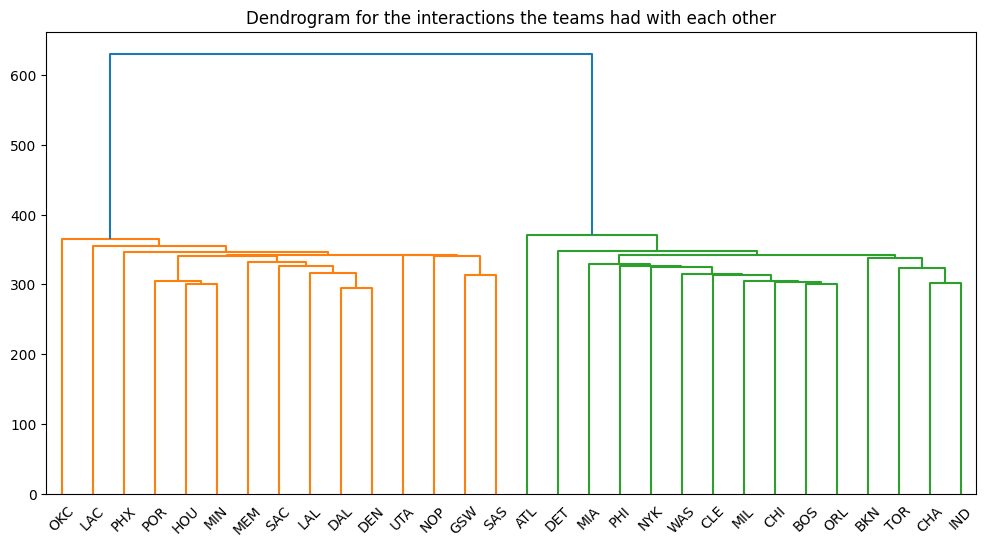

In [17]:
plt.figure(figsize=(12, 6))

dendro = hc.dendrogram(hc.linkage(abbrv_interaction_count_m, method = 'single'), labels = abbrv_interaction_count_df.columns)

plt.title('Dendrogram for the interactions the teams had with each other')
plt.show()

- Right side --> Eastern Conference
- Left side --> Western Conference

In [18]:
encoder = preprocessing.OneHotEncoder() 
abbrv_data = encoder.fit_transform(abbrv_interactions)
abbrv_co_occurance_M = np.dot(abbrv_data.T, abbrv_data)
labels = [i[3:] for i in encoder.get_feature_names_out()]
abbrv_co_occurance_M = abbrv_co_occurance_M.todense()

In [19]:
np.fill_diagonal(abbrv_co_occurance_M, 0)

abbrv_co_occurance_df = pd.DataFrame(abbrv_co_occurance_M, columns=labels, index=labels)

In [20]:
agg_model = AgglomerativeClustering(n_clusters=2)
labels = agg_model.fit_predict(abbrv_interaction_count_df)

In [21]:
temp = NBA[['PLAYER1_NAME', 'PLAYER2_NAME', 'PLAYER3_NAME']].values.tolist()
temp = [[x for x in y if not pd.isnull(x)] for y in temp] # clean nulls

# convert 3 players interactions to 2 player interactions
three_player_names = [[sorted(x) for x in combinations(y, 2)] for y in temp if len(y)==3] 
three_player_names = np.reshape(three_player_names, (2001*3, 2))

# get 2 players interactions
two_player_names = [sorted(x) for x in temp if len(x)==2] 

# concatenate three players, two players and one player interaction pairs
name_interactions = np.concatenate((three_player_names, two_player_names)) 

In [22]:
encoder = preprocessing.OneHotEncoder() 
name_data = encoder.fit_transform(name_interactions)
name_co_occurance_M = np.dot(name_data.T, name_data)
labels = [i[3:] for i in encoder.get_feature_names_out()]
name_co_occurance_M = name_co_occurance_M.todense()

In [23]:
np.fill_diagonal(name_co_occurance_M, 0)

name_co_occurance_df = pd.DataFrame(name_co_occurance_M, columns=labels, index=labels)

flag = name_co_occurance_df.sum() > 500

name_co_occurance_500_df = name_co_occurance_df.loc[flag.values, flag.values]

In [24]:
name_co_occurance_500_M = name_co_occurance_500_df.values

name_co_occurance_500_M

array([[0., 0., 0., ..., 3., 1., 0.],
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [3., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.]])

C:\Users\sahin\AppData\Local\Temp\ipykernel_23656\365814244.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendro = hc.dendrogram(hc.linkage(name_co_occurance_500_M, method = 'single'))


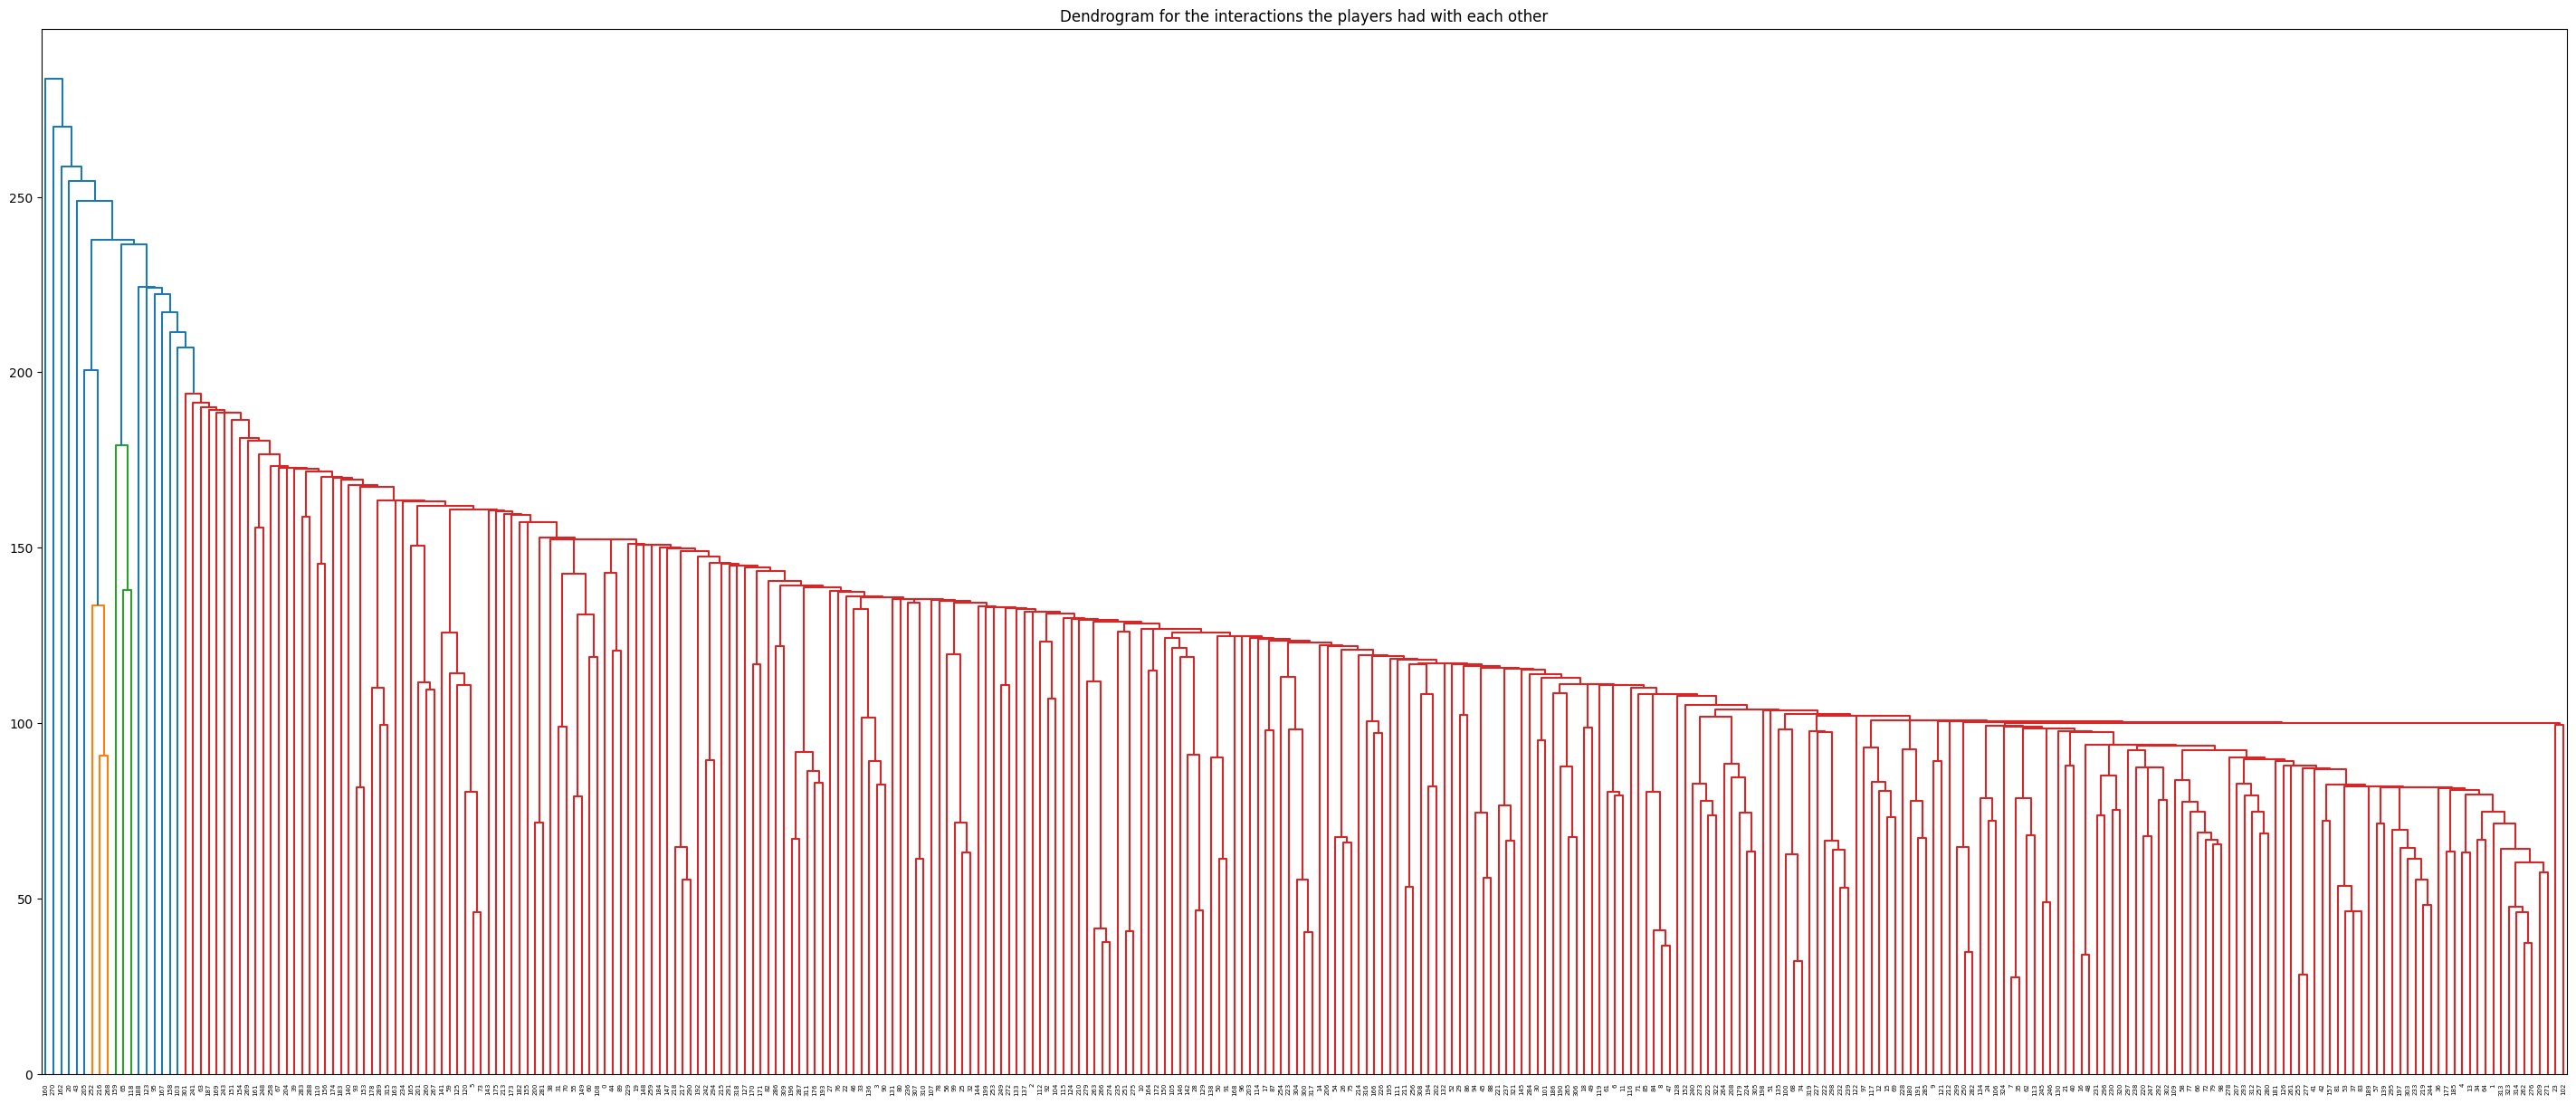

In [25]:
plt.figure(figsize=(36, 15))

dendro = hc.dendrogram(hc.linkage(name_co_occurance_500_M, method = 'single'))

plt.title('Dendrogram for the interactions the players had with each other')
plt.show()

4 clusters is appropriate.